   ID          Datetime  Count
0   0  25-08-2012 00:00      8
1   1  25-08-2012 01:00      2
2   2  25-08-2012 02:00      6
3   3  25-08-2012 03:00      2
4   4  25-08-2012 04:00      2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


                        ID          Datetime  Count    y                  ds
ds                                                                          
2012-08-25 00:00:00      0  25-08-2012 00:00      8    8 2012-08-25 00:00:00
2012-08-25 01:00:00      1  25-08-2012 01:00      2    2 2012-08-25 01:00:00
2012-08-25 02:00:00      2  25-08-2012 02:00      6    6 2012-08-25 02:00:00
2012-08-25 03:00:00      3  25-08-2012 03:00      2    2 2012-08-25 03:00:00
2012-08-25 04:00:00      4  25-08-2012 04:00      2    2 2012-08-25 04:00:00
...                    ...               ...    ...  ...                 ...
2014-09-25 19:00:00  18283  25-09-2014 19:00    868  868 2014-09-25 19:00:00
2014-09-25 20:00:00  18284  25-09-2014 20:00    732  732 2014-09-25 20:00:00
2014-09-25 21:00:00  18285  25-09-2014 21:00    702  702 2014-09-25 21:00:00
2014-09-25 22:00:00  18286  25-09-2014 22:00    580  580 2014-09-25 22:00:00
2014-09-25 23:00:00  18287  25-09-2014 23:00    534  534 2014-09-25 23:00:00

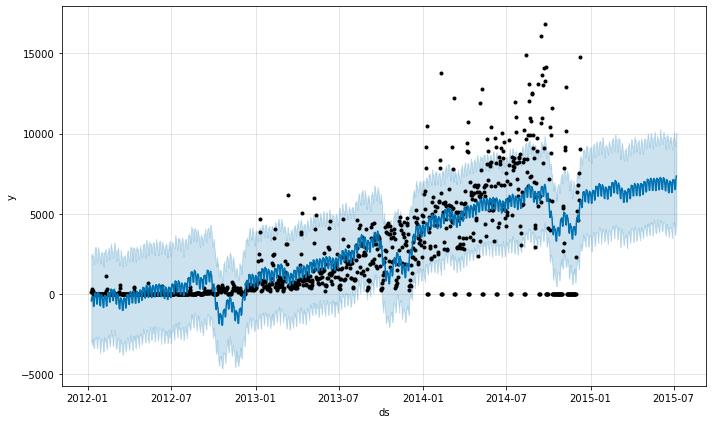

In [32]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
from fbprophet import Prophet

#根据过往两年的数据（2012 年 8 月至 2014 年 8月），需要用这些数据预测接下来 7 个月的乘客数量,以每天为单位聚合数据集
# 读入数据集
df = pd.read_csv('train.csv')
print(df.head())
df['ds'] = pd.to_datetime(df.Datetime)
df = df.set_index('ds')
df['y'] = df['Count']
df['ds'] = df.index
print(df)
df = df[['y','ds']]
df = df.resample("D").sum()
print(df.head())
df['ds'] = df.index
print(df.index)
print(df.head())
# 拟合模型
model = Prophet()
model.fit(df)

# 构建待预测日期数据框，periods = 210 代表除历史数据的日期外再往后推210天即7个月
future = model.make_future_dataframe(periods=210)

# 预测数据集
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# 展示预测结果
model.plot(forecast)
plt.show()

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


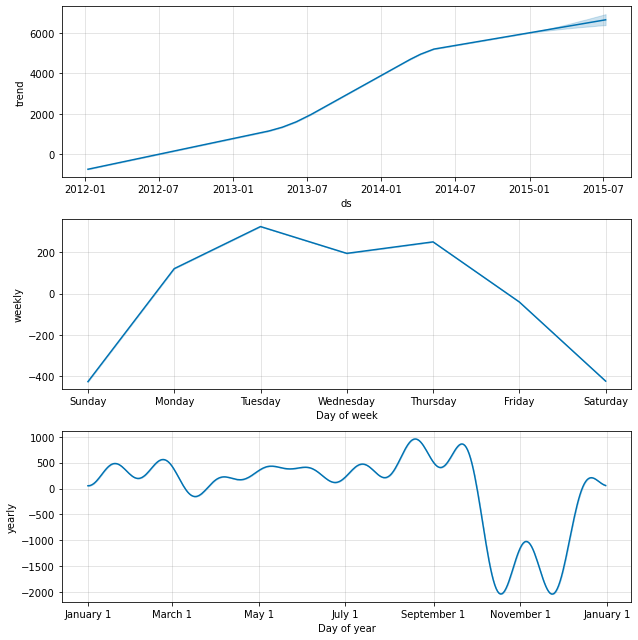

In [30]:
#预测的成分分析绘图，展示预测中的趋势、周效应和年度效应
model.plot_components(forecast)
print(forecast.columns)